In [71]:

import pandas as pd
import numpy as np
# Create the train, test, and validation sets
from sklearn.model_selection import train_test_split

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Import the pad_sequences method from Keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Option 1: Normalizing data using MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Import the confusion_matrix method from sklearn
from sklearn.metrics import confusion_matrix
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report
# Import the Tokenizer method from Keras
from tensorflow.keras.preprocessing.text import Tokenizer
# Import the pad_sequences method from Keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Import Keras modules for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten
from tensorflow.keras.layers import SpatialDropout1D
# Compile the model
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout
import regex as re
nltk.download('stopwords')
# NLTK list of stopwords
from nltk.corpus import reuters, stopwords
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load training the Data
---

In [2]:
# Change the labels to 0s and 1s
def factorize_values(df, senti_codes):
    """ maps the hand classified lables from different datasets to be consistent"""
    df['Sentiments'] = df['Sentiments'].apply(lambda Sentiments: senti_codes[Sentiments])
    return df

In [3]:
#load test data from a lot of different files and replace the labels
# @TODO remove the testing data : Testing DATA

sentiment_tweets_df = pd.read_csv('Data/tweet_sentiment.csv')
sentiment_tweets_df.columns = ["Tweets","Sentiments"]   
sentiment_tweets_df = sentiment_tweets_df[sentiment_tweets_df['Sentiments'] != 0] #TODO for 
  
sentiment_tweets_df['Sentiments'].value_counts()    
sentiment_codes = {1:1,-1:0}
sentiment_tweets_df = factorize_values(sentiment_tweets_df, sentiment_codes)    
sentiment_tweets_df.reset_index(inplace=True, drop=True)
sentiment_tweets_df['Sentiments'].value_counts()    


1    8512
0    2598
Name: Sentiments, dtype: int64

In [4]:
sentiment_tweets_df.head()

,Tweets,Sentiments
0,say american dream dead,0
1,barri silbert extrem optimist bitcoin predict ...,1
2,satellit avoid attack space junk circl earth paid,0
3,senat want emerg alert go netflix spotifi etc,1
4,u propos expedit appeal fight amp time warner ...,0


In [5]:
apple_data_df = pd.read_csv('Data/Apple-Twitter-Sentiment-DFE.csv')
apple_data_df.columns = ["Tweets","Sentiments"]
apple_data_df = apple_data_df[(apple_data_df['Sentiments'] == '1') | (apple_data_df['Sentiments'] == '5') ]

sentiment_codes = {"1":0,"5":1}
apple_data_df = factorize_values(apple_data_df, sentiment_codes)  
apple_data_df.reset_index(inplace=True, drop=True)
apple_data_df['Sentiments'].value_counts() 

0    1219
1     423
Name: Sentiments, dtype: int64

In [6]:
apple_data_df.head()

,Tweets,Sentiments
0,Top 3 all @Apple $AAPL #tablets. Damn right! h...,1
1,CNBCTV: #Apple's margins better than expected?...,1
2,WTF MY BATTERY WAS 31% ONE SECOND AGO AND NOW ...,0
3,RT @peterpham: Bought my @AugustSmartLock at t...,1
4,@apple Contact sync between Yosemite and iOS8 ...,0


In [7]:
stock_pro_df = pd.read_csv('Data/stockpro.csv',header=None, index_col=None)
stock_pro_df.drop(columns=[0,1,2], inplace=True)
stock_pro_df.dropna(inplace = True)
stock_pro_df.reset_index(inplace=True, drop=True)
stock_pro_df.columns = ["Tweets","Sentiments"]
stock_pro_df = stock_pro_df[(stock_pro_df['Sentiments'] != 0) ]

sentiment_codes = {1:1,-1:0}
stock_pro_df = factorize_values(stock_pro_df,sentiment_codes)    

stock_pro_df['Sentiments'].value_counts()   


1    423
0    160
Name: Sentiments, dtype: int64

In [8]:
stock_pro_df.head()

,Tweets,Sentiments
0,$ADBE NEW ARTICLE : Adobe: Still A Great Buy h...,1
1,$F NEW ARTICLE : Ford's quarterly China sales ...,1
2,$TSLA NEW ARTICLE : Tesla very close to Level-...,1
3,$CE NEW ARTICLE : Celanese announces price inc...,1
5,$GOOG $GOOGL NEW ARTICLE : Google reportedly c...,0


In [9]:
citronResearch_df = pd.read_csv('Data/citron.csv',header=None)
citronResearch_df.drop(columns=[0,1,2], inplace=True)

citronResearch_df.columns = ["Tweets","Sentiments"]
citronResearch_df = citronResearch_df[citronResearch_df['Sentiments'] != 0]
citronResearch_df.dropna(inplace = True)
citronResearch_df.reset_index(inplace=True, drop=True)
sentiment_codes = {1:1,-1:0}
citronResearch_df = factorize_values(citronResearch_df,sentiment_codes)    
 

citronResearch_df['Sentiments'].value_counts()   


0    159
1     51
Name: Sentiments, dtype: int64

In [10]:
citronResearch_df.head()

,Tweets,Sentiments
0,$SONO remains hot on way to $30 or takeout- de...,1
1,$INO has become a chew toy for RobinHood trade...,1
2,$SONO is dominating home audio in the new stay...,1
3,$NKLA back to $40 in a month. The anti-Tesla I...,1
4,Secretary of State warns about investing in Ch...,0


In [11]:
transcriptdaily_df = pd.read_csv('Data/transcriptdaily.csv',header=None)
transcriptdaily_df.drop(columns=[0,1,2], inplace=True)

transcriptdaily_df.columns = ["Tweets","Sentiments"]
transcriptdaily_df = transcriptdaily_df[transcriptdaily_df['Sentiments'] != "0"]
transcriptdaily_df.dropna(inplace = True)
transcriptdaily_df.reset_index(inplace=True, drop=True)
sentiment_codes = {"B":1,"S":0}
transcriptdaily_df = factorize_values(transcriptdaily_df,sentiment_codes)    

transcriptdaily_df['Sentiments'].value_counts()   

1    689
0    625
Name: Sentiments, dtype: int64

In [12]:
tickerreport_df = pd.read_csv('Data/tickerreport.csv',header=None)
tickerreport_df.drop(columns=[0,1,2], inplace=True)
tickerreport_df.columns = ["Tweets","Sentiments"]
tickerreport_df = tickerreport_df[tickerreport_df['Sentiments'] != "0"]
tickerreport_df.dropna(inplace = True)
tickerreport_df.reset_index(inplace=True, drop=True)
sentiment_codes = {"B":1,"S":0}
tickerreport_df = factorize_values(tickerreport_df,sentiment_codes)    
tickerreport_df['Sentiments'].value_counts()   


0    489
1    458
Name: Sentiments, dtype: int64

In [13]:
tickerreport_df.head()

,Tweets,Sentiments
0,ePlus $PLUS Stock Rating Lowered by BidaskClub...,0
1,Uniqure $QURE Lowered to Sell at BidaskClub ht...,0
2,R1 RCM $RCM Upgraded to “Hold” at BidaskClub h...,1
3,RealReal $REAL Rating Lowered to Hold at Bidas...,0
4,Rush Enterprises $RUSHA Upgraded to “Hold” at ...,1


In [14]:
handclassifiedLiveFeed_df= pd.read_csv('Data/handClassified.csv')
handclassifiedLiveFeed_df.columns = ["Tweets","Sentiments"]

handclassifiedLiveFeed_df = handclassifiedLiveFeed_df[handclassifiedLiveFeed_df['Sentiments'] != "x"]
handclassifiedLiveFeed_df.dropna(inplace = True)
handclassifiedLiveFeed_df.reset_index(inplace=True, drop=True)
sentiment_codes = {"p":1,"n":0}
handclassifiedLiveFeed_df = factorize_values(handclassifiedLiveFeed_df,sentiment_codes)
handclassifiedLiveFeed_df.head()
handclassifiedLiveFeed_df['Sentiments'].value_counts() 

0    1530
1     681
Name: Sentiments, dtype: int64

In [15]:
handclassifiedLiveFeed_df.head()

,Tweets,Sentiments
0,The price of lumber $LB_F is down 22% since hi...,0
1,Barry Silbert is extremely optimistic on bitco...,1
2,@RealMoney's David Butler's favorite FANG stoc...,1
3,Hedge fund manager Marc Larsy says bitcoin $40...,1
4,U.S. proposes expedited appeal in fight with A...,1


### Concatenating all the data
---

In [16]:
data_df = pd.concat([sentiment_tweets_df, apple_data_df, stock_pro_df, citronResearch_df,transcriptdaily_df,tickerreport_df, handclassifiedLiveFeed_df])
data_df.reset_index(inplace=True, drop=True)

data_df.head()

,Tweets,Sentiments
0,say american dream dead,0
1,barri silbert extrem optimist bitcoin predict ...,1
2,satellit avoid attack space junk circl earth paid,0
3,senat want emerg alert go netflix spotifi etc,1
4,u propos expedit appeal fight amp time warner ...,0


### Shuffling the data
---

In [17]:
data_df=data_df.sample(frac=1).reset_index(drop=True) #Shuffling the data

### Pre-Processing of Data
---

In [18]:
# cleaning up the tweets and adding more stopwords
data_df = data_df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
REMOVE_STOCK_SYMBOLS = re.compile('(\$\w+)(\w*[a-zA-Z]\w*)')
REMOVE_AT_THE_RATE_SYMBOLS = re.compile('(\@\w+)(\w*[a-zA-Z]\w*)')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
stopwords = nltk.corpus.stopwords.words('english')
#Stopwords
list_of_stopwords = ['rt', 'zacks','imperial capital brokers','brokers','valuengine','inc','price traget','article','join','investment research',
                    'zacks investment research']
stopword_from_nltk = set(stopwords)
STOPWORDS = stopword_from_nltk.union(list_of_stopwords)
print(STOPWORDS)
def clean_text(text):
    """
        text: a string        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = re.sub("(?P<url>https?://[^\s]+)", "", text) #remove url
    text = REMOVE_AT_THE_RATE_SYMBOLS.sub('',text)                
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = REMOVE_STOCK_SYMBOLS.sub('',text) # remove stock symbols
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    
    return text
data_df['Tweets'] = data_df['Tweets'].apply(clean_text)
data_df['Tweets'] = data_df['Tweets'].str.replace('\d+', '')

{"doesn't", 'have', 'mustn', 'then', 'valuengine', 'our', 'each', 'which', 'yours', 'imperial capital brokers', 't', 'not', 'he', "you've", 'investment research', 'they', 'up', 'yourselves', 'for', 'aren', 'over', 'article', "shouldn't", 'below', 'doesn', 'against', 'ma', 'hasn', 'doing', 'what', 'of', "hasn't", 'this', "mightn't", 'if', 'to', 'most', 'your', 'there', 'itself', 'didn', "needn't", 'o', 'now', 'too', 'ours', 'theirs', 'above', 'will', 'that', 'with', 'ourselves', 'both', 'y', 'were', 'an', 'price traget', 've', 'into', 'the', 'where', 'had', 'been', 'through', 'myself', 'his', 'needn', 'while', 'here', 'because', 'their', 'just', 'some', 'why', 'll', 'wasn', 'can', 'weren', "aren't", 'my', 'few', 'mightn', 'such', 'from', 'on', "weren't", "didn't", "you'd", 'how', 'join', 'zacks', 'themselves', 'me', 'couldn', 'who', "she's", 'other', 'no', 'am', 'him', 'until', 'once', 'by', 'between', "mustn't", 'inc', 're', 'but', 'her', 'you', "shan't", 'haven', 'i', "couldn't", 'doe

In [19]:
#Testing RegEx
print(clean_text("Zacks: Article $Alcoa cuts adjusted EBITDA forecast citing tariffs shares slide https://t.co/mdMJXjnYIs https://t.co/5O8fvwlHpY"))

cuts adjusted ebitda forecast citing tariffs shares slide


In [20]:
#is it a balanced class?
data_df['Sentiments'].value_counts()


1    11237
0     6780
Name: Sentiments, dtype: int64

In [21]:
# Create the features set (X) and the target vector (y)
X = data_df["Tweets"].values
y = data_df["Sentiments"].values

In [72]:
from wordcloud import WordCloud 


# Word cloud of positive sentiments

df_pos = data_df[ data_df['Sentiments'] == 1]
df_pos = df_pos['Tweets']
df_neg = data_df[ data_df['Sentiments'] == 0]
df_neg = df_neg['Tweets']

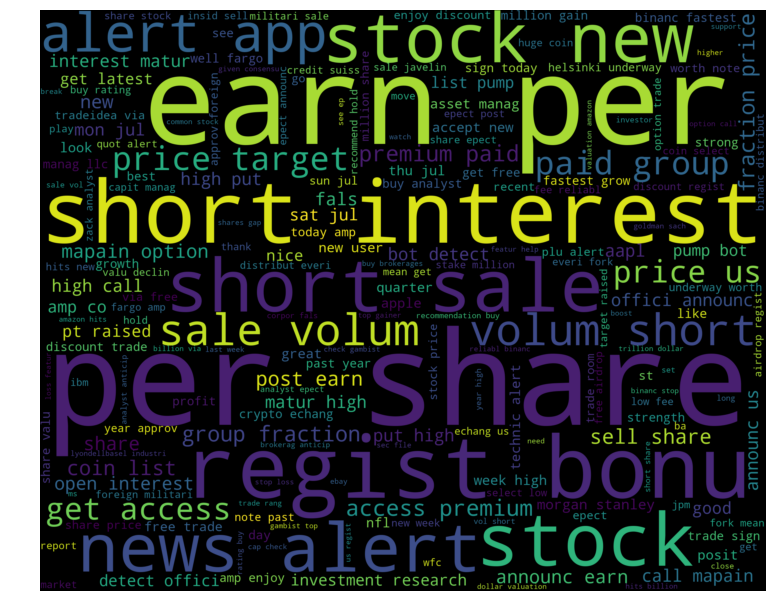

In [77]:
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_pos))
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud1.to_file("Data/postive_sentiments.png")

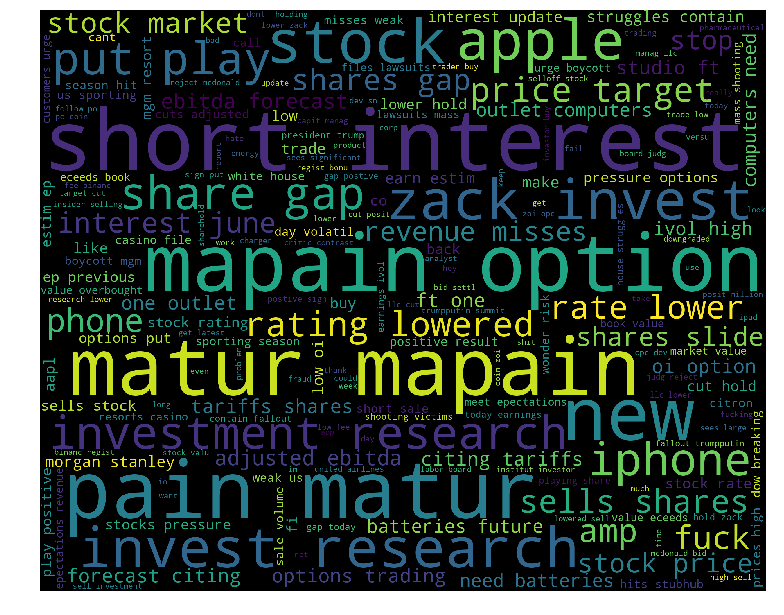

In [76]:
# Word cloud of negative sentiments
wordcloud2 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df_neg))
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

wordcloud2.to_file("Data/negative_sentiments.png")

# The Artificial Neural Network Model - 
### uses Embedding, RNN LSTM 
Resolves Overfitting with iterations of between layers and monitoring val_loss with callbacks and only saving the best model: 
- Dropouts and recurrent dropouts 
- Callback EarlyStopping & ModelCheckpoint
---

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [25]:
# Create an instance of the Tokenizer and fit it with the X text data
tokenizer = Tokenizer(lower=True,
filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n', split=" ")
tokenizer.fit_on_texts(X)

In [26]:
# saving the tokenizer models 
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [27]:
# Print the first five elements of the encoded vocabulary
for token in list(tokenizer.word_index)[:5]:
    print(f"word: '{token}', token: {tokenizer.word_index[token]}")
    
print('Found %s unique tokens.' % len(tokenizer.word_index))

word: 'stock', token: 1
word: 'share', token: 2
word: 'short', token: 3
word: 'new', token: 4
word: 'price', token: 5
Found 14674 unique tokens.


In [28]:
# Let's try and lemmtize wods
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
type(tokenizer)
review = [ps.stem(token) for token in list(tokenizer.word_index)]
print('Found %s unique tokens.' % len(review))

# import these modules 
from nltk.stem import WordNetLemmatizer 



from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
print("rocks :", lemmatizer.lemmatize("rocks")) 

Found 14674 unique tokens.
rocks : rock


In [29]:
# Transform the text data to numerical sequences
X_seq = tokenizer.texts_to_sequences(X)

In [30]:
# Contrast a sample numerical sequence with its text version
print("**Text comment**")
print({X[102]})

**Text comment**
{'yoyow current worth check binanc registr current open'}


In [31]:
print("**Numerical sequence representation**")
print(X_seq[100])

**Numerical sequence representation**
[64, 72, 220, 125, 165, 176, 51, 12]


In [32]:
# Set the pad size
max_words = 10

# Pad the sequences using the pad_sequences() method
X_pad = pad_sequences(X_seq, maxlen=max_words, padding="post")
print('Shape of data tensor:', X_pad.shape)


Shape of data tensor: (18017, 10)


In [33]:
# Creating training, validation, and testing sets using the encoded data
# X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_pad, y, test_size=0.25, random_state=1)

# X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_train_rnn, y_train_rnn)

### Balancing the class
---

In [34]:
# Undersample the data using `RandomUnderSampler`

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# X_resampled_rnn, y_resampled_rnn = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(X_train_rnn, y_train_rnn)
# Counter(y_resampled_rnn)

# ros = RandomUnderSampler(random_state=1)
# X_resampled_rnn, y_resampled_rnn = ros.fit_resample(X_pad, y)

ros = RandomOverSampler(random_state=1)
X_resampled_rnn, y_resampled_rnn = ros.fit_resample(X_pad, y)

# Creating training, validation, and testing sets using the encoded data
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_resampled_rnn, y_resampled_rnn, test_size=0.2,random_state=1)

X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_train_rnn, y_train_rnn,test_size=0.1,random_state=1)

Counter(y_train_rnn)

Counter({0: 8119, 1: 8062})

In [35]:
X_pad[10]

array([2799, 2329,    5,  236,   64,  473,   35,  230,  519,   31])

In [36]:
print(X_train_rnn.shape,y_train_rnn.shape)
print(X_test_rnn.shape,y_test_rnn.shape)

(16181, 10) (16181,)
(4495, 10) (4495,)


In [37]:
# Model set-up
vocabulary_size = len(tokenizer.word_counts.keys()) + 1
embedding_size = 50
print(vocabulary_size)

14675


In [38]:
print(X_train_rnn.shape,y_train_rnn.shape)
print(X_test_rnn.shape,y_test_rnn.shape)

(16181, 10) (16181,)
(4495, 10) (4495,)


### Training the model
---

#### 1. Saving the best model (without overfitting) with a callback model with patience level 3

In [39]:
# file to save the trained model
file_path = "best_model.hdf5"

#check_point to stop the model

check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                              save_best_only = True, mode = "min")
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)

#### 2. THE ART (not the Science) of creating the best RNN LSTM model. 
##### - Empirically chosing the best layers/dorpout/recurrent dropout and neuron units.

In [40]:
# Define the LSTM RNN model
model = Sequential()

number_units = 140
dropout_fraction = 0.30

# Layer 1
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(Dropout(dropout_fraction))

# # Layer 2

model.add(LSTM(units=number_units, dropout=dropout_fraction, recurrent_dropout=dropout_fraction,return_sequences=True))
model.add(Dropout(dropout_fraction))


# # Layer 3
model.add(LSTM(units=number_units))


# Output layer
model.add(Dense(units=1, activation="sigmoid"))

#### 3. Compiling the model chosing binary_crossentropy for binary classification 

In [41]:
# the accuracy computed with the Keras method evaluate is just plain wrong 
# when using binary_crossentropy with more than 2 labels

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
    ],
)

#### 4. Model Summary of the RNN LSTM Model

In [42]:
# Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 50)            733750    
_________________________________________________________________
dropout (Dropout)            (None, 10, 50)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 10, 140)           106960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 140)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 140)               157360    
_________________________________________________________________
dense (Dense)                (None, 1)                 141       
Total params: 998,211
Trainable params: 998,211
Non-trainable params: 0
__________________________________________________

#### 5. Training the model if FITting the model

#### Details
- Batch Size = 1000
- Epochs = 10 (but the callback of patience level 3 quits in 9 Epoch stores the best model in 7)
- Validation of 10%


In [43]:
# Training the model

# Using callback for saving the best model with a patience level of 3

batch_size = 1000
epochs = 10
history = model.fit(
    X_train_rnn,
    y_train_rnn,
    validation_data=(X_val_rnn, y_val_rnn),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
    callbacks = [check_point, early_stop]
)

Epoch 1/10
17/17 [==============================] - ETA: 0s - loss: 0.6396 - accuracy: 0.6753
Epoch 00001: val_loss improved from inf to 0.40322, saving model to best_model.hdf5
17/17 [==============================] - 8s 446ms/step - loss: 0.6396 - accuracy: 0.6753 - val_loss: 0.4032 - val_accuracy: 0.8220
Epoch 2/10
17/17 [==============================] - ETA: 0s - loss: 0.3498 - accuracy: 0.8553
Epoch 00002: val_loss improved from 0.40322 to 0.22639, saving model to best_model.hdf5
17/17 [==============================] - 7s 399ms/step - loss: 0.3498 - accuracy: 0.8553 - val_loss: 0.2264 - val_accuracy: 0.9210
Epoch 3/10
17/17 [==============================] - ETA: 0s - loss: 0.1872 - accuracy: 0.9280
Epoch 00003: val_loss improved from 0.22639 to 0.16248, saving model to best_model.hdf5
17/17 [==============================] - 6s 344ms/step - loss: 0.1872 - accuracy: 0.9280 - val_loss: 0.1625 - val_accuracy: 0.9433
Epoch 4/10
17/17 [==============================] - ETA: 0s - los

In [44]:
# Predict classes using the testing data

y_rnn_pred = model.predict_classes(X_test_rnn, batch_size=batch_size)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [45]:
y_rnn_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [46]:
#Testing making sure both classes are preserved in the prediction
np.unique(y_rnn_pred)

array([0, 1])

In [47]:
# Evaluate the model
model.evaluate(X_test_rnn, y_test_rnn,batch_size=batch_size)

5/5 [==============================] - 0s 78ms/step - loss: 0.1944 - accuracy: 0.9473


[0.19444844126701355, 0.9472747445106506]

In [48]:
# Make sentiment predictions
# predicted = model.predict_classes(X_test_rnn[:200])
# np.unique(predicted)
print(f' total # of 1s ={np.count_nonzero(y_rnn_pred == 1)}')
print(f' total # of 0s ={np.count_nonzero(y_rnn_pred == 0)}')

 total # of 1s =2228
 total # of 0s =2267


In [49]:
# Create a DataFrame of Real and Predicted values
sentiments = pd.DataFrame({"Text": X[:200], "Actual": y_test_rnn[:200], "Predicted": y_rnn_pred[:200].ravel()})
sentiments

,Text,Actual,Predicted
0,alaska air group alk given averag recommend ho...,0,0
1,anyon short htz shit pan crazi lol,1,1
2,get shit together ill guy samsung galay s,0,0
3,united airlines due coronavirus hit seeks fedr...,0,0
4,eps meet epectations revenue,0,0
5,estat asset watch price gainer today amzn goog...,0,0
6,rop open interest matur high put high call map...,1,1
7,us get premium trade signal us rcn snrg bci vr...,1,1
8,yesterdays selloff stock market carried today,0,0
9,farmer trust co decreas posit lauder este co e...,0,0


In [50]:
#Testing the model with a real tweet from twitter
test_word = "J.P. Morgan upgraded $TWTR share to overweight"

tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw,maxlen=max_words)
prediction = int(model.predict(tw).round().item())
print(model.predict(tw))

sentiment_label = data_df.Sentiments.factorize()
prediction

[[0.9986187]]


1

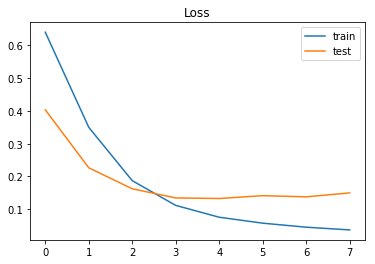

In [70]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [54]:
# Display classification report for the RNN LSTM Model
print("Classification Report for the RNN LSTM Model")
print(classification_report(y_rnn_pred, y_test_rnn))

Classification Report for the RNN LSTM Model
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2267
           1       0.94      0.95      0.95      2228

    accuracy                           0.95      4495
   macro avg       0.95      0.95      0.95      4495
weighted avg       0.95      0.95      0.95      4495



In [55]:
# Import the roc_curve and auc metrics from sklearn
from sklearn.metrics import roc_curve, auc

In [56]:
# Making predictions to feed the roc_curve module
test_predictions_rnn = model.predict(X_test_rnn, batch_size=1000)

In [57]:
# Data for ROC Curve - RNN LSTM Model
fpr_test_rnn, tpr_test_rnn, thresholds_test_rnn = roc_curve(y_test_rnn, test_predictions_rnn)

In [58]:
# AUC for the RNN LSTM Model
auc_test_rnn = auc(fpr_test_rnn, tpr_test_rnn)
auc_test_rnn = round(auc_test_rnn, 4)

In [59]:
# Dataframe to plot ROC Curve for the RNN LSTM model
roc_df_test_rnn = pd.DataFrame({"FPR Test": fpr_test_rnn, "TPR Test": tpr_test_rnn,})

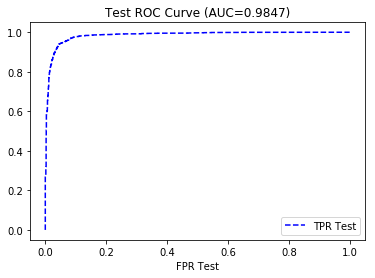

In [60]:
roc_df_test_rnn.plot(
    x="FPR Test",
    y="TPR Test",
    color="blue",
    style="--",
    xlim=([-0.05, 1.05]),
    title=f"Test ROC Curve (AUC={auc_test_rnn})",
)

In [61]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

### Testing the model by loading the weights and describe model using json
---

In [ ]:
# First loading the tokenizer which was fit into the dataset
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [67]:
#Loading the model and weights

from tensorflow.keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("best_model.hdf5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
    ],
)

score = loaded_model.evaluate(X_test_rnn, y_test_rnn,batch_size=batch_size)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
5/5 [==============================] - 0s 55ms/step - loss: 0.1721 - accuracy: 0.9435
accuracy: 94.35%


In [68]:
tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw,maxlen=max_words)
prediction = int(loaded_model.predict(tw).round().item())
print(loaded_model.predict(tw))

sentiment_label = data_df.Sentiments.factorize()
prediction

[[0.9946896]]


1